In [1]:
import pandas as pd
import numpy as np
import math
from numpy import nan
import matplotlib.pyplot as plt

In [2]:
def get_participant_labels(df):
    participant = df['participant'].unique()
    participant_labels = np.ndarray.tolist(participant)
    participant_labels.remove("test")
    
    return participant_labels

In [3]:
def extact_ratings_and_rt(df, participant_label):
    df_N = df.loc[df['participant'] == participant_label]
    df_N_ratings = df_N[['file_name', 'slider.response', 'slider.rt', 'spacebar_continue.rt']]
    df_N_ratings = df_N_ratings.dropna()
    
    df_N_ratings['rating_rt'] = df_N_ratings['slider.rt'] + df_N_ratings['spacebar_continue.rt']
    df_N_ratings = df_N_ratings.drop(['slider.rt', 'spacebar_continue.rt'], axis=1)
    
    return df_N_ratings

In [4]:
def split_red_and_green(df_N_ratings):
    df_N_red = df_N_ratings[df_N_ratings['file_name'].str.match(r'([1-9]|1[0])[ci][sn]$')== True]
    df_N_green = df_N_ratings[df_N_ratings['file_name'].str.match(r'(([1][1-9])|[2][0])[ci][sn]$')== True]
    
    return df_N_red, df_N_green

In [5]:
def get_red_average(df_N_red):
    
    df_N_red_cs = df_N_red[df_N_red['file_name'].str.match(r'\d+[c][s]$')== True]
    df_N_red_cn = df_N_red[df_N_red['file_name'].str.match(r'\d+[c][n]$')== True]
    df_N_red_is = df_N_red[df_N_red['file_name'].str.match(r'\d+[i][s]$')== True]
    df_N_red_in = df_N_red[df_N_red['file_name'].str.match(r'\d+[i][n]$')== True]
    
    df_N_red_cs_mean = df_N_red_cs[['slider.response', 'rating_rt']].mean()
    df_N_red_cn_mean = df_N_red_cn[['slider.response', 'rating_rt']].mean()
    df_N_red_is_mean = df_N_red_is[['slider.response', 'rating_rt']].mean()
    df_N_red_in_mean = df_N_red_in[['slider.response', 'rating_rt']].mean()
    
    cs_mean = df_N_red_cs_mean.tolist()
    cn_mean = df_N_red_cn_mean.tolist()
    is_mean = df_N_red_is_mean.tolist()
    in_mean = df_N_red_in_mean.tolist()
    

    global df_rating_red_mean
    global df_rt_red_mean

    df1 = pd.DataFrame([[cs_mean[0],  cn_mean[0],  is_mean[0],  in_mean[0]]], columns=['cs', 'cn', 'is', 'in'])
    df2 = pd.DataFrame([[cs_mean[1],  cn_mean[1],  is_mean[1],  in_mean[1]]], columns=['cs', 'cn', 'is', 'in'])
    
    df_rating_red_mean = pd.concat([df_rating_red_mean, df1], ignore_index = True)
    df_rt_red_mean = pd.concat([df_rt_red_mean, df2], ignore_index = True)
    

In [6]:
def get_green_average(df_N_green):
    
    df_N_green_cs = df_N_green[df_N_green['file_name'].str.match(r'\d+[c][s]$')== True]
    df_N_green_cn = df_N_green[df_N_green['file_name'].str.match(r'\d+[c][n]$')== True]
    df_N_green_is = df_N_green[df_N_green['file_name'].str.match(r'\d+[i][s]$')== True]
    df_N_green_in = df_N_green[df_N_green['file_name'].str.match(r'\d+[i][n]$')== True]
    
    df_N_green_cs_mean = df_N_green_cs[['slider.response', 'rating_rt']].mean()
    df_N_green_cn_mean = df_N_green_cn[['slider.response', 'rating_rt']].mean()
    df_N_green_is_mean = df_N_green_is[['slider.response', 'rating_rt']].mean()
    df_N_green_in_mean = df_N_green_in[['slider.response', 'rating_rt']].mean()
    
    cs_mean = df_N_green_cs_mean.tolist()
    cn_mean = df_N_green_cn_mean.tolist()
    is_mean = df_N_green_is_mean.tolist()
    in_mean = df_N_green_in_mean.tolist()

    global df_rating_green_mean
    global df_rt_green_mean
    
    df1 = pd.DataFrame([[cs_mean[0],  cn_mean[0],  is_mean[0],  in_mean[0]]], columns=['cs', 'cn', 'is', 'in'])
    df2 = pd.DataFrame([[cs_mean[1],  cn_mean[1],  is_mean[1],  in_mean[1]]], columns=['cs', 'cn', 'is', 'in'])
    
    df_rating_green_mean = pd.concat([df_rating_green_mean, df1], ignore_index = True)
    df_rt_green_mean = pd.concat([df_rt_green_mean, df2], ignore_index = True)
    

In [7]:
# get all data
anova_data = pd.read_csv("Database_AllParticipants.csv")
df = anova_data[['participant', 'file_name', 'slider.response', 'slider.rt', 'spacebar_continue.rt', 'scale_slider.response']]

participant_labels = get_participant_labels(df) #get all participant labels

#crete empty dataframes
df_rating_red_mean = pd.DataFrame(columns = ["cs", "cn", "is", "in"])
df_rt_red_mean = pd.DataFrame(columns = ["cs", "cn", "is", "in"])
df_rating_green_mean = pd.DataFrame(columns = ["cs", "cn", "is", "in"])
df_rt_green_mean = pd.DataFrame(columns = ["cs", "cn", "is", "in"])

#split dataframe into half (red & green)
for participant_label in participant_labels:
    df_N_ratings = extact_ratings_and_rt(df, participant_label)
    df_N_red, df_N_green = split_red_and_green(df_N_ratings)
    get_red_average(df_N_red)
    get_green_average(df_N_green)

In [8]:
#rescale the ratings from 1-2 to 0-1
df_rating_red_mean -=1
df_rating_green_mean -=1

In [9]:
df_rating_red_mean #data for ratings of red (congruent) regions

,cs,cn,is,in
0,0.845826,0.788843,0.548142,0.165551
1,0.749013,0.689145,0.271053,0.242544
2,0.626957,0.544565,0.799348,0.345000
3,0.849073,0.760368,0.848823,0.706770
4,0.817222,0.821481,0.743889,0.122037
5,0.761750,0.496750,0.738500,0.410250
6,0.765111,0.764444,0.494667,0.195556
7,0.818394,0.533201,0.837122,0.417952
8,0.836900,0.866700,0.187800,0.156200
9,0.829425,0.809152,0.122783,0.119215


In [10]:
df_rating_green_mean #data for ratings of green (congruent) regions

,cs,cn,is,in
0,0.153943,0.119655,0.357878,0.761429
1,0.293640,0.187281,0.661623,0.664474
2,0.211522,0.352826,0.158696,0.740000
3,0.177039,0.356698,0.339332,0.642678
4,0.152037,0.141111,0.208333,0.752593
5,0.148250,0.203250,0.165000,0.487500
6,0.151333,0.374000,0.432889,0.683556
7,0.245379,0.506392,0.197468,0.632087
8,0.196300,0.184200,0.791800,0.804100
9,0.140254,0.127134,0.765255,0.749702


In [11]:
df_rt_red_mean #data for reaction times of red (congruent) regions

,cs,cn,is,in
0,5.875640,5.219290,4.437330,4.211790
1,3.525611,3.606532,2.929039,4.092580
2,5.610300,3.098200,5.261800,2.053300
3,4.118110,2.101320,5.440700,2.700640
4,5.379010,15.403890,9.052200,6.226970
5,5.130800,7.194400,9.025000,6.201800
6,5.372400,2.515000,6.719700,2.717500
7,8.236710,6.917460,15.675760,6.030470
8,4.839060,4.628090,4.841040,3.849330
9,9.391330,4.713640,3.841160,4.800530


In [12]:
df_rt_green_mean #data for reaction times of green (congruent) regions

,cs,cn,is,in
0,5.867490,3.684950,5.042970,4.74566
1,3.735756,3.367175,2.780131,5.18834
2,3.877300,2.814900,6.216900,4.31470
3,3.775100,2.526620,7.063990,3.75269
4,2.866630,4.172370,9.076530,3.71963
5,9.161500,9.566000,11.554500,10.22110
6,5.535300,3.605700,9.675200,4.96440
7,9.927940,13.271340,16.767310,7.47094
8,4.316030,2.890210,5.376300,6.44612
9,5.015550,2.936010,7.516770,6.03604


## Some descriptive stats

In [13]:
df_rt_red_mean.mean()

cs    6.717701
cn    5.489657
is    8.036771
in    5.128917
dtype: float64

In [14]:
df_rt_red_mean.std()

cs    4.735557
cn    3.228441
is    5.087740
in    3.099281
dtype: float64

In [15]:
df_rt_green_mean.mean()

cs    7.447141
cn    6.609961
is    7.455120
in    5.974645
dtype: float64

In [16]:
df_rt_green_mean.std()

cs    6.259620
cn    6.837392
is    4.138913
in    4.274129
dtype: float64

In [17]:
df_rating_red_mean.mean()

cs    0.803796
cn    0.670328
is    0.614080
in    0.331839
dtype: float64

In [18]:
df_rating_red_mean.std()

cs    0.067761
cn    0.154783
is    0.282744
in    0.181920
dtype: float64

In [19]:
df_rating_green_mean.mean()

cs    0.179553
cn    0.325337
is    0.358155
in    0.643573
dtype: float64

In [20]:
df_rating_green_mean.std()

cs    0.062167
cn    0.191335
is    0.226858
in    0.137228
dtype: float64

## create dataframe for rating & RT data of red (congruent) regions

In [21]:
df_red_mean_anova = pd.DataFrame(columns = ["Congruency", "Presence", "Rating", "RT"])

In [22]:
for i in range(len(df_rating_red_mean["cs"])):
    df1 = pd.DataFrame([["Congruent", "Shown", df_rating_red_mean["cs"][i], df_rt_red_mean["cs"][i]]], columns = ["Congruency", "Presence", "Rating", "RT"])
    df_red_mean_anova = pd.concat([df_red_mean_anova, df1], ignore_index = True)

In [23]:
for i in range(len(df_rating_red_mean["cn"])):
    df1 = pd.DataFrame([["Congruent", "Not Shown", df_rating_red_mean["cn"][i], df_rt_red_mean["cn"][i]]], columns = ["Congruency", "Presence", "Rating", "RT"])
    df_red_mean_anova = pd.concat([df_red_mean_anova, df1], ignore_index = True)

In [24]:
for i in range(len(df_rating_red_mean["is"])):
    df1 = pd.DataFrame([["Incongruent", "Shown", df_rating_red_mean["is"][i], df_rt_red_mean["is"][i]]], columns = ["Congruency", "Presence", "Rating", "RT"])
    df_red_mean_anova = pd.concat([df_red_mean_anova, df1], ignore_index = True)

In [25]:
for i in range(len(df_rating_red_mean["in"])):
    df1 = pd.DataFrame([["Incongruent", "Not Shown", df_rating_red_mean["in"][i], df_rt_red_mean["in"][i]]], columns = ["Congruency", "Presence", "Rating", "RT"])
    df_red_mean_anova = pd.concat([df_red_mean_anova, df1], ignore_index = True)

In [26]:
df_red_mean_anova

,Congruency,Presence,Rating,RT
0,Congruent,Shown,0.845826,5.875640
1,Congruent,Shown,0.749013,3.525611
2,Congruent,Shown,0.626957,5.610300
3,Congruent,Shown,0.849073,4.118110
4,Congruent,Shown,0.817222,5.379010
...,...,...,...,...
115,Incongruent,Not Shown,0.424580,2.059100
116,Incongruent,Not Shown,0.623333,3.724000
117,Incongruent,Not Shown,0.511762,5.362270
118,Incongruent,Not Shown,0.194667,4.205600


In [27]:
df_red_mean_anova["Subject"] = list(range(1,31))+list(range(1,31))+list(range(1,31))+list(range(1,31))

In [28]:
df_red_mean_anova

,Congruency,Presence,Rating,RT,Subject
0,Congruent,Shown,0.845826,5.875640,1
1,Congruent,Shown,0.749013,3.525611,2
2,Congruent,Shown,0.626957,5.610300,3
3,Congruent,Shown,0.849073,4.118110,4
4,Congruent,Shown,0.817222,5.379010,5
...,...,...,...,...,...
115,Incongruent,Not Shown,0.424580,2.059100,26
116,Incongruent,Not Shown,0.623333,3.724000,27
117,Incongruent,Not Shown,0.511762,5.362270,28
118,Incongruent,Not Shown,0.194667,4.205600,29


## Red: Rating ANOVA

In [29]:
df_rating_red_mean.mean()

cs    0.803796
cn    0.670328
is    0.614080
in    0.331839
dtype: float64

In [30]:
df_rating_red_mean.std()

cs    0.067761
cn    0.154783
is    0.282744
in    0.181920
dtype: float64

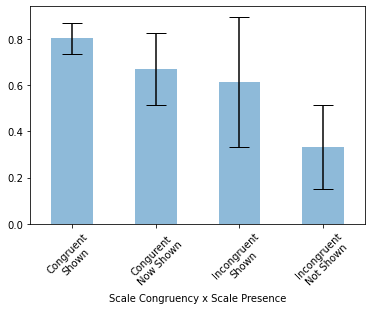

In [31]:
df_rating_red_mean.mean().plot(kind="bar", yerr=df_rating_red_mean.std(), alpha=0.5, capsize=10)
plt.xlabel('Scale Congruency x Scale Presence')
plt.xticks([0, 1, 2, 3], ['Congruent\nShown', 'Congurent\nNow Shown', 'Incongruent\nShown', 'Incongruent\nNot Shown'], rotation=45)
plt.show()

In [32]:
df_red_mean_anova

,Congruency,Presence,Rating,RT,Subject
0,Congruent,Shown,0.845826,5.875640,1
1,Congruent,Shown,0.749013,3.525611,2
2,Congruent,Shown,0.626957,5.610300,3
3,Congruent,Shown,0.849073,4.118110,4
4,Congruent,Shown,0.817222,5.379010,5
...,...,...,...,...,...
115,Incongruent,Not Shown,0.424580,2.059100,26
116,Incongruent,Not Shown,0.623333,3.724000,27
117,Incongruent,Not Shown,0.511762,5.362270,28
118,Incongruent,Not Shown,0.194667,4.205600,29


In [33]:
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.stats.anova import AnovaRM

rating_factorial_model = AnovaRM(data=df_red_mean_anova, depvar='Rating', within=['Congruency', 'Presence'], subject='Subject').fit()
print(rating_factorial_model)

                      Anova
                    F Value Num DF  Den DF Pr > F
-------------------------------------------------
Congruency          28.1073 1.0000 29.0000 0.0000
Presence            66.6692 1.0000 29.0000 0.0000
Congruency:Presence 14.9228 1.0000 29.0000 0.0006



In [34]:
import pingouin as pg

aov_rating = pg.rm_anova(dv='Rating',within=['Congruency', 'Presence'], subject='Subject', data=df_red_mean_anova, effsize="np2")
print(aov_rating.round(3))

                  Source     SS  ddof1  ddof2     MS       F  p-unc   
0             Congruency  2.093      1     29  2.093  28.107  0.000  \
1               Presence  1.296      1     29  1.296  66.669  0.000   
2  Congruency * Presence  0.166      1     29  0.166  14.923  0.001   

   p-GG-corr    np2  eps  
0      0.000  0.492  1.0  
1      0.000  0.697  1.0  
2      0.001  0.340  1.0  


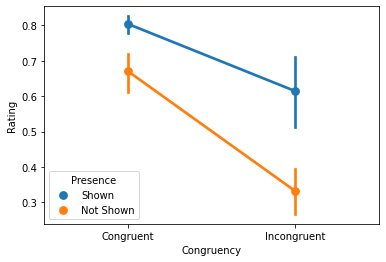

In [35]:
import seaborn as sns

ax = sns.pointplot(x="Congruency", y="Rating", hue="Presence",
                    data=df_red_mean_anova)

### pairwise comparisons for interaction (use Bonferroni corrected criterion for significance of p < .017)

In [36]:
#t-test -> incongruent scale rate lower for scale not shown than scale shown
from scipy import stats

index = (df_red_mean_anova['Presence']=='Not Shown') & (df_red_mean_anova['Congruency']=='Incongruent')
NI = df_red_mean_anova[index]['Rating'] 

index = (df_red_mean_anova['Presence']=='Shown') & (df_red_mean_anova['Congruency']=='Incongruent')
SI = df_red_mean_anova[index]['Rating']

stats.ttest_rel(NI, SI) #significant

Ttest_relResult(statistic=-7.744124768976914, pvalue=1.5372386009079374e-08)

In [37]:
cohen_d = pg.compute_effsize(NI, SI, paired=True, eftype='cohen')
cohen_d

-1.187190433402481

In [38]:
#t-test -> congruent scale rate no difference for scale not shown and scale shown
from scipy import stats

index = (df_red_mean_anova['Presence']=='Not Shown') & (df_red_mean_anova['Congruency']=='Congruent')
NC = df_red_mean_anova[index]['Rating'] 

index = (df_red_mean_anova['Presence']=='Shown') & (df_red_mean_anova['Congruency']=='Congruent')
SC = df_red_mean_anova[index]['Rating']

stats.ttest_rel(NC, SC) #significant, there is a difference, visible ones have higher rate than invisible ones

Ttest_relResult(statistic=-5.011226236456529, pvalue=2.4586951718022216e-05)

In [39]:
cohen_d = pg.compute_effsize(NC, SC, paired=True, eftype='cohen')
cohen_d

-1.1171035150272

In [40]:
#t-test -> scales that are shown rate no difference for congruent and incongruent ones
from scipy import stats

index = (df_red_mean_anova['Presence']=='Shown') & (df_red_mean_anova['Congruency']=='Congruent')
SC = df_red_mean_anova[index]['Rating'] 

index = (df_red_mean_anova['Presence']=='Shown') & (df_red_mean_anova['Congruency']=='Incongruent')
SI = df_red_mean_anova[index]['Rating']

stats.ttest_rel(SC, SI) #significant, there is a difference, congruent ones rate higher than incongruent ones

Ttest_relResult(statistic=3.713493812471309, pvalue=0.0008657183025338685)

In [41]:
cohen_d = pg.compute_effsize(SC, SI, paired=True, eftype='cohen')
cohen_d

0.9227835636756342

## Red: RT ANOVA

In [42]:
df_rt_red_mean.mean()

cs    6.717701
cn    5.489657
is    8.036771
in    5.128917
dtype: float64

In [43]:
df_rt_red_mean.std()

cs    4.735557
cn    3.228441
is    5.087740
in    3.099281
dtype: float64

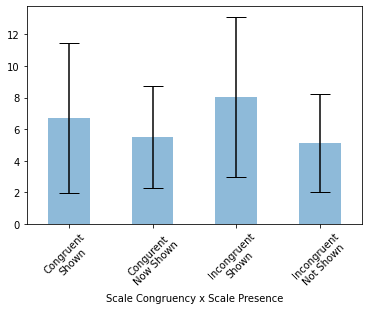

In [44]:
df_rt_red_mean.mean().plot(kind="bar", yerr=df_rt_red_mean.std(), alpha=0.5, capsize=10)
plt.xlabel('Scale Congruency x Scale Presence')
plt.xticks([0, 1, 2, 3], ['Congruent\nShown', 'Congurent\nNow Shown', 'Incongruent\nShown', 'Incongruent\nNot Shown'], rotation=45)
plt.show()

In [45]:
rt_factorial_model = AnovaRM(data=df_red_mean_anova, depvar='RT', within=['Congruency', 'Presence'], subject='Subject').fit()
print(rt_factorial_model)

                      Anova
                    F Value Num DF  Den DF Pr > F
-------------------------------------------------
Congruency           1.1388 1.0000 29.0000 0.2947
Presence            13.0087 1.0000 29.0000 0.0012
Congruency:Presence  2.9700 1.0000 29.0000 0.0955



In [46]:
aov_rt = pg.rm_anova(dv='RT',within=['Congruency', 'Presence'], subject='Subject', data=df_red_mean_anova, effsize="np2")
print(aov_rt.round(3))

                  Source       SS  ddof1  ddof2       MS       F  p-unc   
0             Congruency    6.888      1     29    6.888   1.139  0.295  \
1               Presence  128.292      1     29  128.292  13.009  0.001   
2  Congruency * Presence   21.163      1     29   21.163   2.970  0.095   

   p-GG-corr    np2  eps  
0      0.295  0.038  1.0  
1      0.001  0.310  1.0  
2      0.095  0.093  1.0  


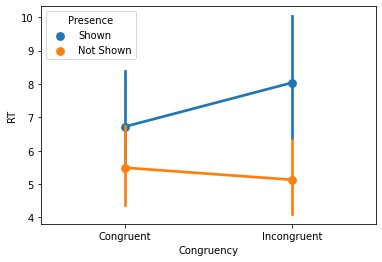

In [47]:
ax = sns.pointplot(x="Congruency", y="RT", hue="Presence",
                    data=df_red_mean_anova)

## Green: Rating ANOVA

In [48]:
df_rating_green_mean.mean()

cs    0.179553
cn    0.325337
is    0.358155
in    0.643573
dtype: float64

In [49]:
df_rating_green_mean.std()

cs    0.062167
cn    0.191335
is    0.226858
in    0.137228
dtype: float64

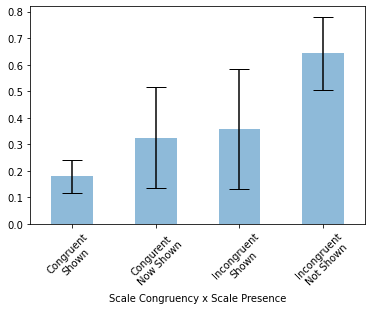

In [50]:
df_rating_green_mean.mean().plot(kind="bar", yerr=df_rating_green_mean.std(), alpha=0.5, capsize=10)
plt.xlabel('Scale Congruency x Scale Presence')
plt.xticks([0, 1, 2, 3], ['Congruent\nShown', 'Congurent\nNow Shown', 'Incongruent\nShown', 'Incongruent\nNot Shown'], rotation=45)
plt.show()

In [51]:
df_green_mean_anova = pd.DataFrame(columns = ["Congruency", "Presence", "Rating", "RT"])

In [52]:
for i in range(len(df_rating_green_mean["cs"])):
    df1 = pd.DataFrame([["Congruent", "Shown", df_rating_green_mean["cs"][i], df_rt_green_mean["cs"][i]]], columns = ["Congruency", "Presence", "Rating", "RT"])
    df_green_mean_anova = pd.concat([df_green_mean_anova, df1], ignore_index = True)

In [53]:
for i in range(len(df_rating_green_mean["cn"])):
    df1 = pd.DataFrame([["Congruent", "Not Shown", df_rating_green_mean["cn"][i], df_rt_green_mean["cn"][i]]], columns = ["Congruency", "Presence", "Rating", "RT"])
    df_green_mean_anova = pd.concat([df_green_mean_anova, df1], ignore_index = True)

In [54]:
for i in range(len(df_rating_green_mean["is"])):
    df1 = pd.DataFrame([["Incongruent", "Shown", df_rating_green_mean["is"][i], df_rt_green_mean["is"][i]]], columns = ["Congruency", "Presence", "Rating", "RT"])
    df_green_mean_anova = pd.concat([df_green_mean_anova, df1], ignore_index = True)

In [55]:
for i in range(len(df_rating_red_mean["in"])):
    df1 = pd.DataFrame([["Incongruent", "Not Shown", df_rating_green_mean["in"][i], df_rt_green_mean["in"][i]]], columns = ["Congruency", "Presence", "Rating", "RT"])
    df_green_mean_anova = pd.concat([df_green_mean_anova, df1], ignore_index = True)

In [56]:
df_green_mean_anova["Subject"] = list(range(1,31))+list(range(1,31))+list(range(1,31))+list(range(1,31))

In [57]:
df_green_mean_anova

,Congruency,Presence,Rating,RT,Subject
0,Congruent,Shown,0.153943,5.867490,1
1,Congruent,Shown,0.293640,3.735756,2
2,Congruent,Shown,0.211522,3.877300,3
3,Congruent,Shown,0.177039,3.775100,4
4,Congruent,Shown,0.152037,2.866630,5
...,...,...,...,...,...
115,Incongruent,Not Shown,0.488346,2.234700,26
116,Incongruent,Not Shown,0.674306,2.375600,27
117,Incongruent,Not Shown,0.624130,4.223450,28
118,Incongruent,Not Shown,0.772222,6.255200,29


In [58]:
aov_rating_green = pg.rm_anova(dv='Rating',within=['Congruency', 'Presence'], subject='Subject', data=df_green_mean_anova, effsize="np2")
print(aov_rating_green.round(3))

                  Source     SS  ddof1  ddof2     MS       F  p-unc   
0             Congruency  1.851      1     29  1.851  33.092  0.000  \
1               Presence  1.395      1     29  1.395  67.819  0.000   
2  Congruency * Presence  0.146      1     29  0.146   7.411  0.011   

   p-GG-corr    np2  eps  
0      0.000  0.533  1.0  
1      0.000  0.700  1.0  
2      0.011  0.204  1.0  


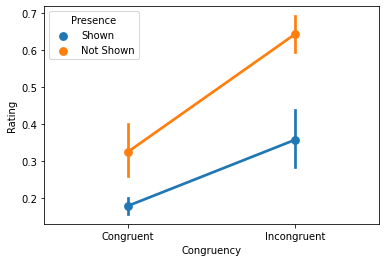

In [59]:
ax = sns.pointplot(x="Congruency", y="Rating", hue="Presence",
                    data=df_green_mean_anova)

### pairwise comparisons for interaction (use Bonferroni corrected criterion for significance of p < .017)

In [60]:
#t-test -> incongruent scale rate higher for scale not shown than scale shown
from scipy import stats

index = (df_green_mean_anova['Presence']=='Not Shown') & (df_green_mean_anova['Congruency']=='Incongruent')
NI = df_green_mean_anova[index]['Rating'] 

index = (df_green_mean_anova['Presence']=='Shown') & (df_green_mean_anova['Congruency']=='Incongruent')
SI = df_green_mean_anova[index]['Rating']

stats.ttest_rel(NI, SI) #significant

Ttest_relResult(statistic=7.831854258499092, pvalue=1.2283385868182859e-08)

In [61]:
cohen_d = pg.compute_effsize(NI, SI, paired=True, eftype='cohen')
cohen_d

1.5224055381856505

In [62]:
#t-test -> congruent scale rate no difference for scale not shown and scale shown
from scipy import stats

index = (df_green_mean_anova['Presence']=='Not Shown') & (df_green_mean_anova['Congruency']=='Congruent')
NC = df_green_mean_anova[index]['Rating'] 

index = (df_green_mean_anova['Presence']=='Shown') & (df_green_mean_anova['Congruency']=='Congruent')
SC = df_green_mean_anova[index]['Rating']

stats.ttest_rel(NC, SC) #significant, there is a difference, visible ones have lower rate than invisible ones

Ttest_relResult(statistic=3.955826412938073, pvalue=0.0004509904300495923)

In [63]:
cohen_d = pg.compute_effsize(NC, SC, paired=True, eftype='cohen')
cohen_d

1.0247908393269172

In [64]:
#t-test -> scales that are shown rate no difference for congruent and incongruent ones
from scipy import stats

index = (df_green_mean_anova['Presence']=='Shown') & (df_green_mean_anova['Congruency']=='Congruent')
SC = df_green_mean_anova[index]['Rating'] 

index = (df_green_mean_anova['Presence']=='Shown') & (df_green_mean_anova['Congruency']=='Incongruent')
SI = df_green_mean_anova[index]['Rating']

stats.ttest_rel(SC, SI) #significant, there is a difference, congruent ones rate lower than incongruent ones

Ttest_relResult(statistic=-4.12726216059593, pvalue=0.0002828801542283988)

In [65]:
cohen_d = pg.compute_effsize(SC, SI, paired=True, eftype='cohen')
cohen_d

-1.0737968818573251

## Green: RT ANOVA

In [66]:
df_rt_green_mean.mean()

cs    7.447141
cn    6.609961
is    7.455120
in    5.974645
dtype: float64

In [67]:
df_rt_green_mean.std()

cs    6.259620
cn    6.837392
is    4.138913
in    4.274129
dtype: float64

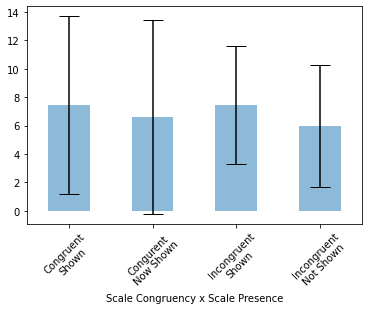

In [68]:
df_rt_green_mean.mean().plot(kind="bar", yerr=df_rt_green_mean.std(), alpha=0.5, capsize=10)
plt.xlabel('Scale Congruency x Scale Presence')
plt.xticks([0, 1, 2, 3], ['Congruent\nShown', 'Congurent\nNow Shown', 'Incongruent\nShown', 'Incongruent\nNot Shown'], rotation=45)
plt.show()

In [69]:
aov_rt_green = pg.rm_anova(dv='RT',within=['Congruency', 'Presence'], subject='Subject', data=df_green_mean_anova, effsize="np2")
print(aov_rt_green.round(3))

                  Source      SS  ddof1  ddof2      MS      F  p-unc   
0             Congruency   2.952      1     29   2.952  0.093  0.763  \
1               Presence  40.286      1     29  40.286  5.534  0.026   
2  Congruency * Presence   3.104      1     29   3.104  0.338  0.566   

   p-GG-corr    np2  eps  
0      0.763  0.003  1.0  
1      0.026  0.160  1.0  
2      0.566  0.012  1.0  


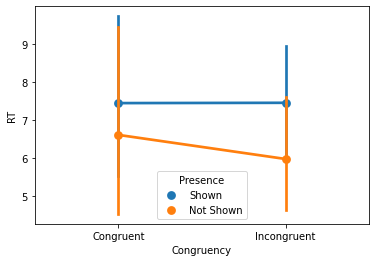

In [70]:
ax = sns.pointplot(x="Congruency", y="RT", hue="Presence",
                    data=df_green_mean_anova)

# ANOVA Summary

As for maps asking to rate red (congruent) region:
1. Rating
    
    a. Congruency of the scale: significant (congruent > incongruent)
    
    b. Presence of the scale: significant (shown > not shown)
    
    c. Interaction between congruency and presence: significant
        
        - incongruent scale rate higher for scale not shown than scale shown
        - congruent scale rate higher for visible ones than invisible ones
        - scale that are not shown rate higher for congruent ones than incongruent ones
2. RT
    
    a. Presence of the scale: significant (shown > not shown)

As for maps asking to rate green (congruent) region:
1. Rating

    a. Congruency of the scale: significant (congruent < incongruent)
    
    b. Presence of the scale: significant (shown < not shown)
    
    c. Interaction between congruency and presence: significant
        
        - incongruent scale rate lower for scale not shown than scale shown
        - congruent scale rate lower for visible ones than invisible ones
        - scale that are not shown rate lower for congruent ones than incongruent ones
2. RT
    
    a. Presence of the scale: significant (shown > not shown)

## Additional Question: preference of the scale (A. Congruent or B. Incongruent)

In [71]:
scale_list = []
for label in participant_labels:
    df_scale = anova_data["scale_slider.response"].loc[anova_data["participant"] == label]
    scale_list.append(df_scale.dropna().unique()[0])
    
set(scale_list)
A_count = scale_list.count(2.0)
B_count = scale_list.count(1.0)

print(A_count, B_count)
print(A_count/len(scale_list), B_count/len(scale_list))

27 3
0.9 0.1


# Demographic Information

## Gender

In [72]:
gender_list = []
for label in participant_labels:
    df_gender = anova_data["genderResp1.response"].loc[anova_data["participant"] == label]
    gender_list.append(df_gender.dropna().unique()[0])
    
set(gender_list)
female_count = gender_list.count(5.0)
male_count = gender_list.count(4.0)
print(female_count, male_count)
print(female_count/len(gender_list), male_count/len(gender_list))

18 12
0.6 0.4


## Age

In [73]:
age_list = []
for label in participant_labels:
    df_age = anova_data["ageResp.text"].loc[anova_data["participant"] == label]
    age_list.append(list(df_age.dropna())[0])

age_list.remove(2001) #outlier

age_mean = np.mean(age_list)
age_std = np.std(age_list)
age_mean, age_std

(23.103448275862068, 4.603932558796371)

## Education

In [74]:
edu_list = []
for label in participant_labels:
    df_edu = anova_data["edu_slider.response"].loc[anova_data["participant"] == label]
    edu_list.append(list(df_edu.dropna())[0])

set(edu_list)
doc_count = edu_list.count(2.0)
msc_count = edu_list.count(3.0)
bsc_count = edu_list.count(4.0)
high_count = edu_list.count(6.0)

print(doc_count, msc_count, bsc_count, high_count)
print(doc_count/len(edu_list), msc_count/len(edu_list), bsc_count/len(edu_list), high_count/len(edu_list))

1 7 12 10
0.03333333333333333 0.23333333333333334 0.4 0.3333333333333333


# Total Duration

In [75]:
time_list = []
for label in participant_labels:
    df_time = anova_data["total_duration"].loc[anova_data["participant"] == label]
    time_list.append(list(df_time.dropna())[0])

time_mean = np.mean(time_list)
time_std = np.std(time_list)
time_mean/60, time_std/60 #in minutes

(18.006432972221724, 11.80386107501103)